In [1]:
# first we import all relevant packages
from bulk import * # bulk.py stores a lot of my personal functions, i.e. for reading from the .data files and such
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pynbody
from scipy import stats
from scipy.stats import binned_statistic

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue, pynbody.halo.hop.HOPCatalogue]

In [153]:
# we set the global matplotlib parameters so the fonts are all consistent and serif 
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['hatch.linewidth'] = 0.8

In [3]:
s = pynbody.load('/home/akinshol/Data/Sims/newh329/h329.cosmo50PLK.3072gst5HbwK1BH.004096')
s.physical_units()
h = s.halos()

In [51]:
halo = h.load_copy(7)
halo.physical_units()

In [52]:
print(f"Mstar = {np.sum(halo.s['mass']):.2e}")

Mstar = 2.75e+07


In [53]:
feh = halo.s['feh']

Mstar = 1.72e-09
5520
Mstar = 6.88e-12
22
Mstar = 1.64e-11
53
Mstar = 9.36e-11
303


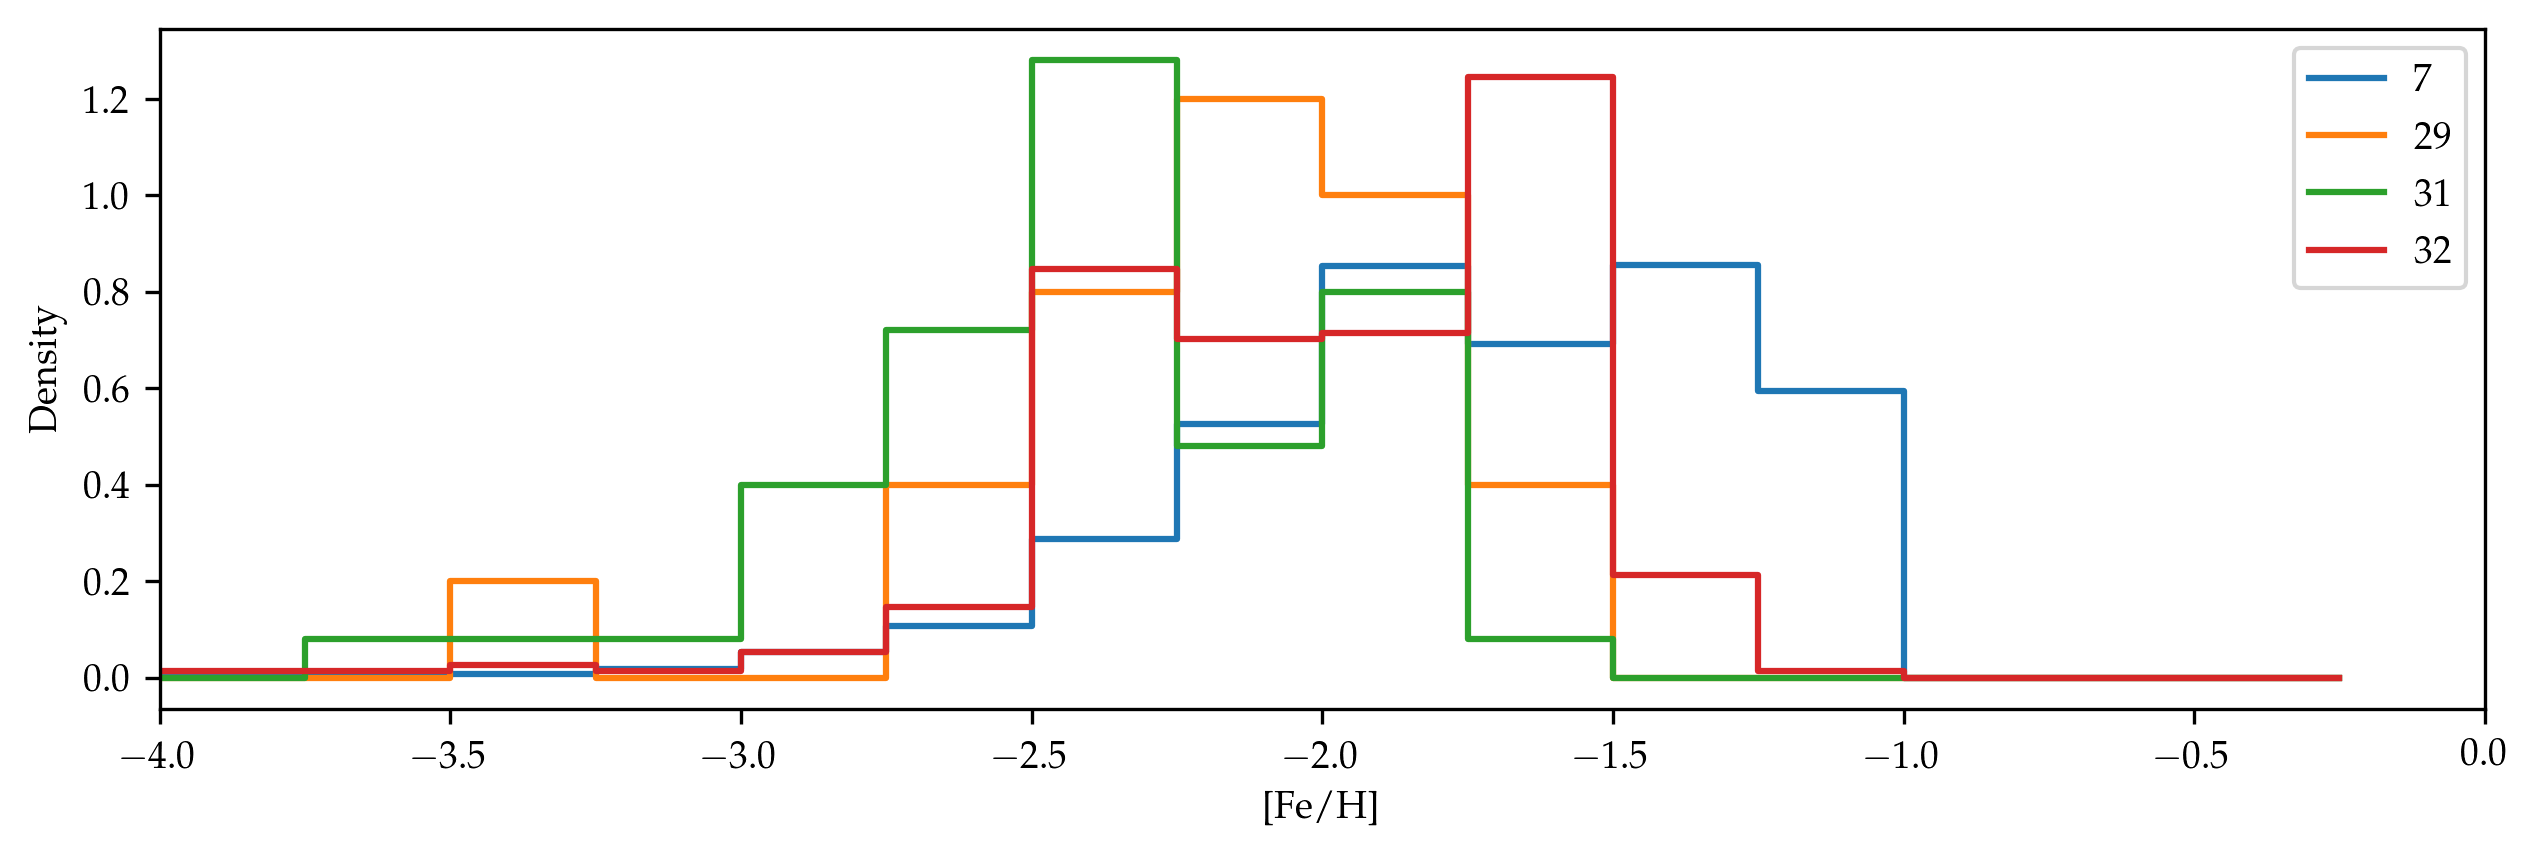

In [82]:
xmin,xmax = -4,0


plt.figure(dpi=300,figsize=(10,3))

for haloid in [7, 29, 31, 32]:#, 55, 94, 116, 119, 131, 154, 443, 490, 786, 1182]:
    halo = h.load_copy(haloid)
    nstar = h[haloid].properties['n_star']
    
    m = np.sum(halo.s['mass'])
    print(f"Mstar = {m:.2e}")
    feh = np.array(halo.s['feh'],dtype=float)

    print(nstar)
    
    bins = np.arange(xmin,xmax,0.25)
    bins, edges = np.histogram(feh, bins=bins, density=True)
    left,right = edges[:-1],edges[1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([bins,bins]).T.flatten()

    plt.plot(X,Y, label=haloid)



plt.xlabel('[Fe/H]')
plt.ylabel('Density')
plt.xlim(xmin,xmax)
plt.legend()
plt.show()

In [87]:
c_data = data[data.haloid==1]
c_data.n_star.tolist()[0]

17878582

1 	 17878582


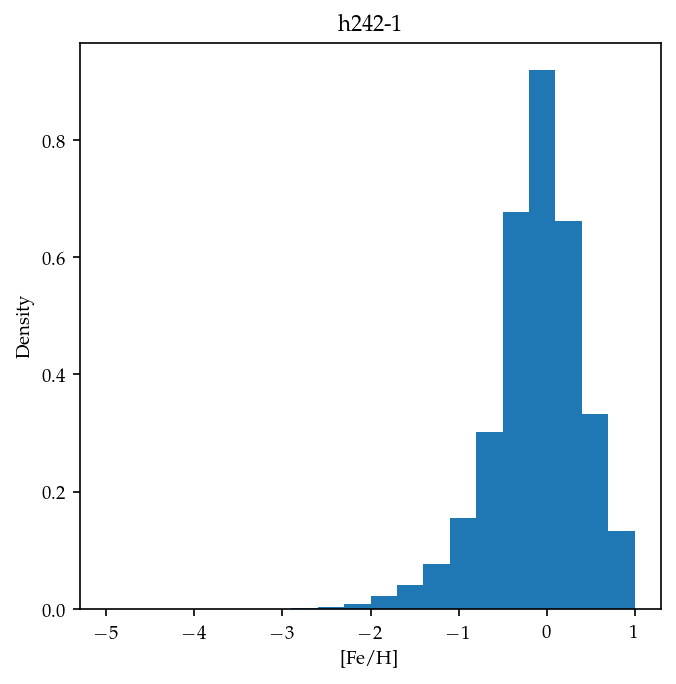

4 	 163865


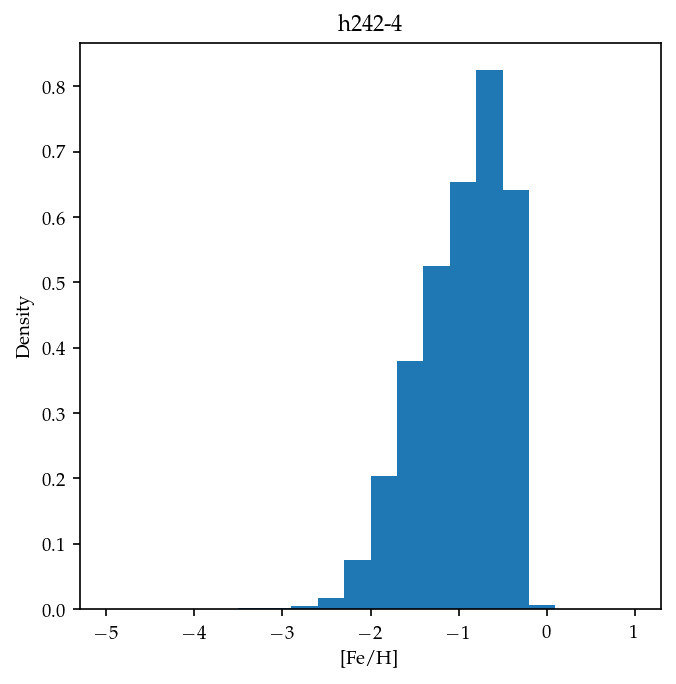

10 	 160009


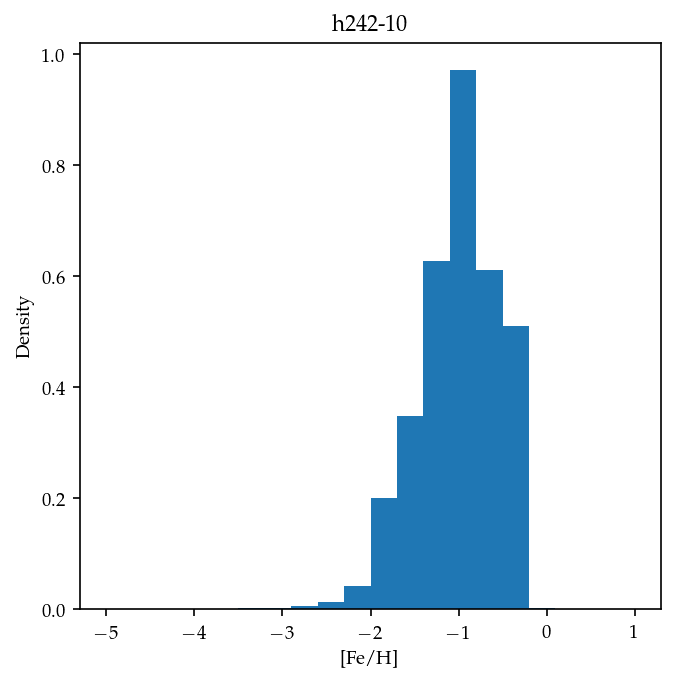

21 	 2467


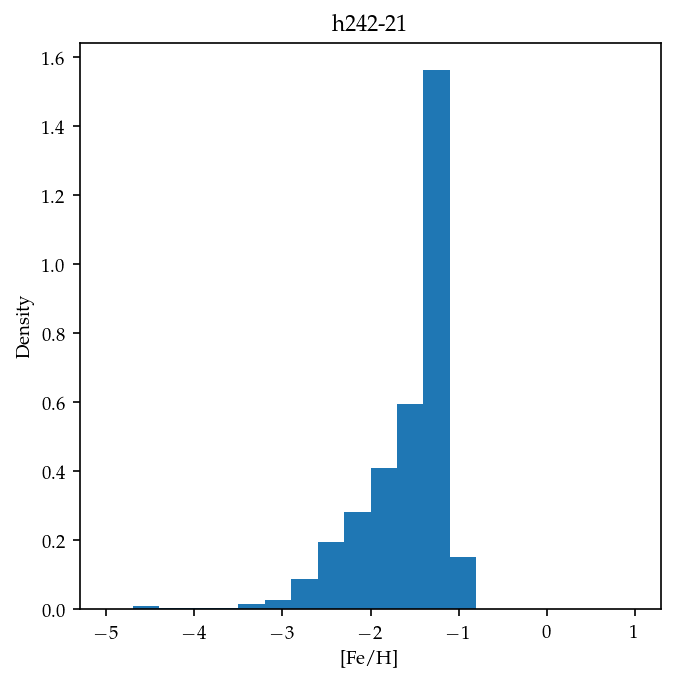

27 	 4359


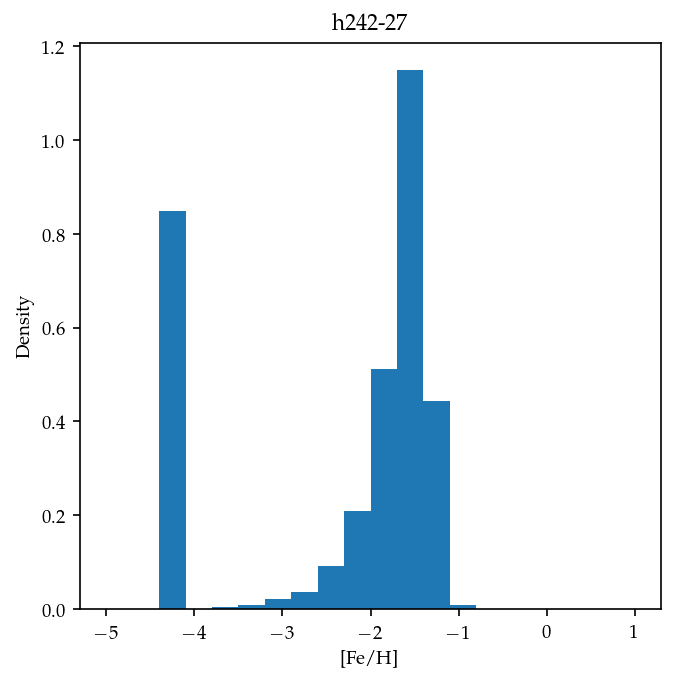

31 	 461


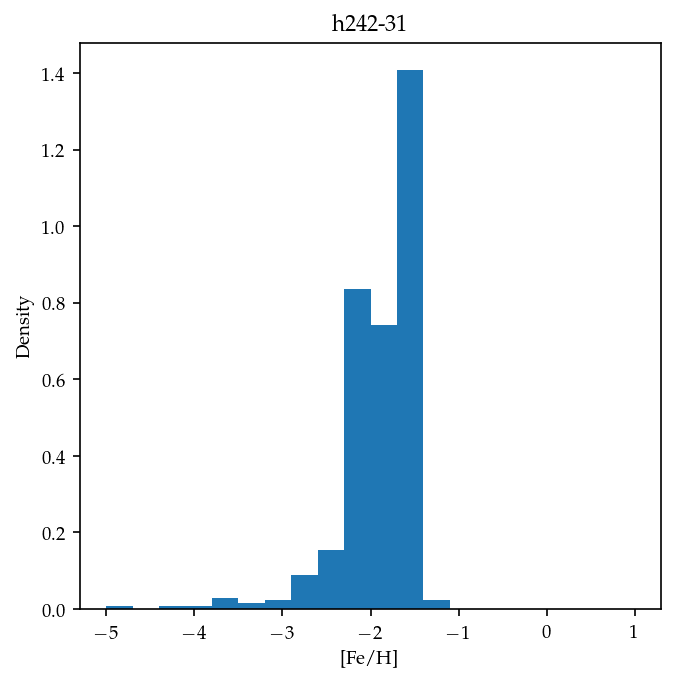

35 	 369


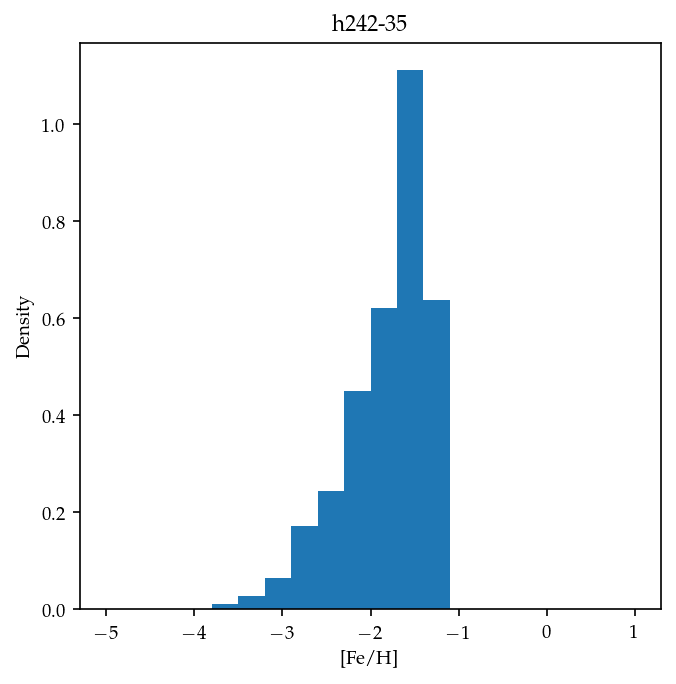

37 	 219


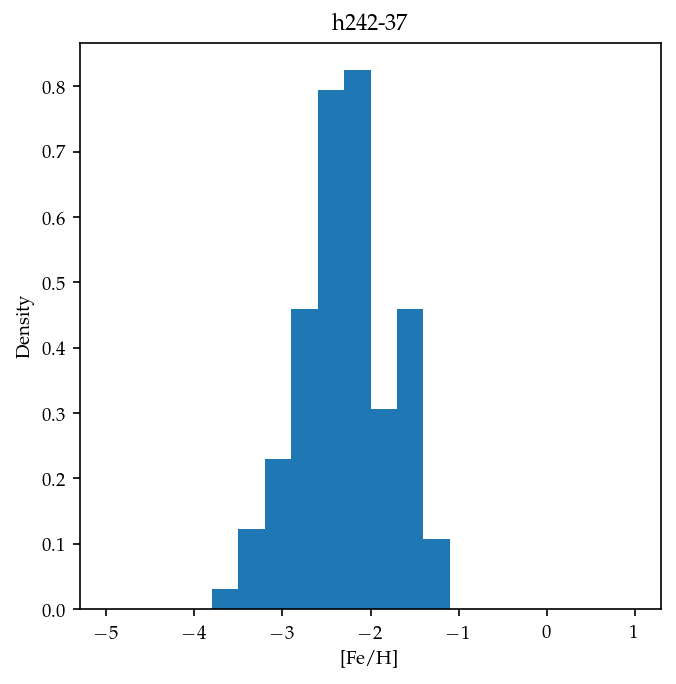

45 	 154


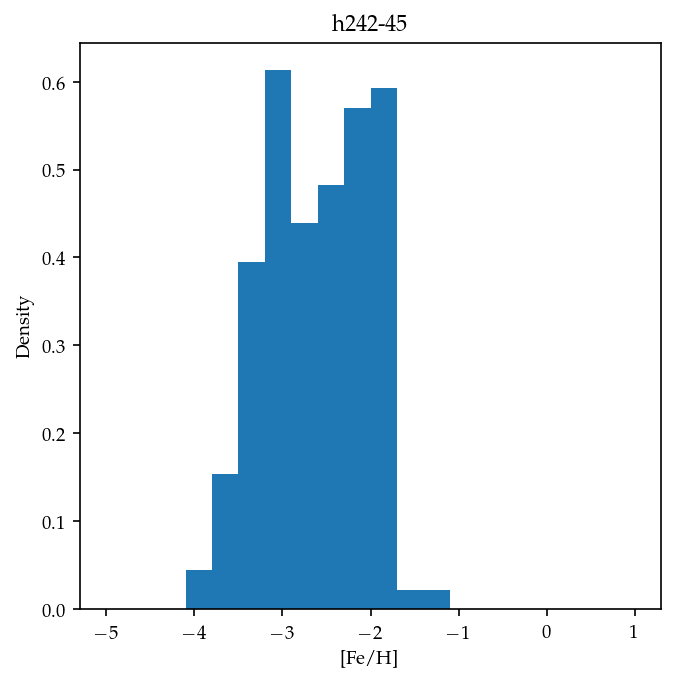

47 	 21


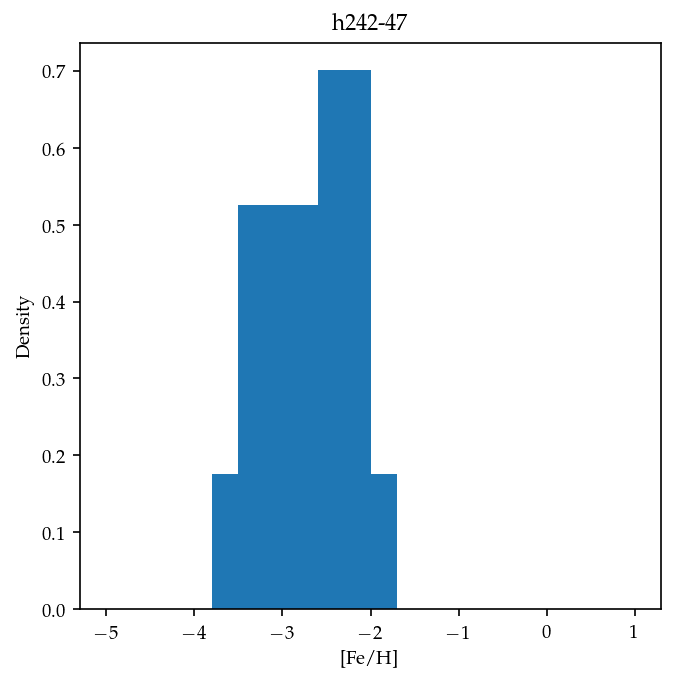

48 	 4951


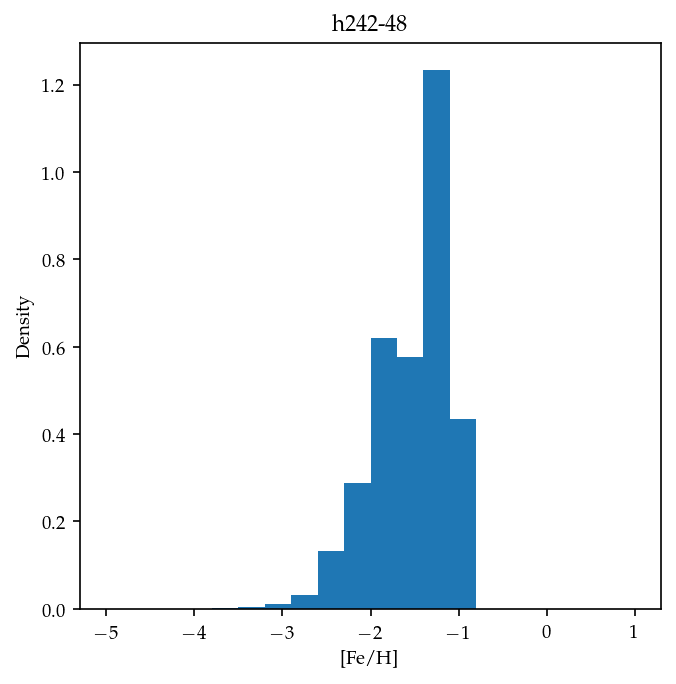

49 	 1


/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


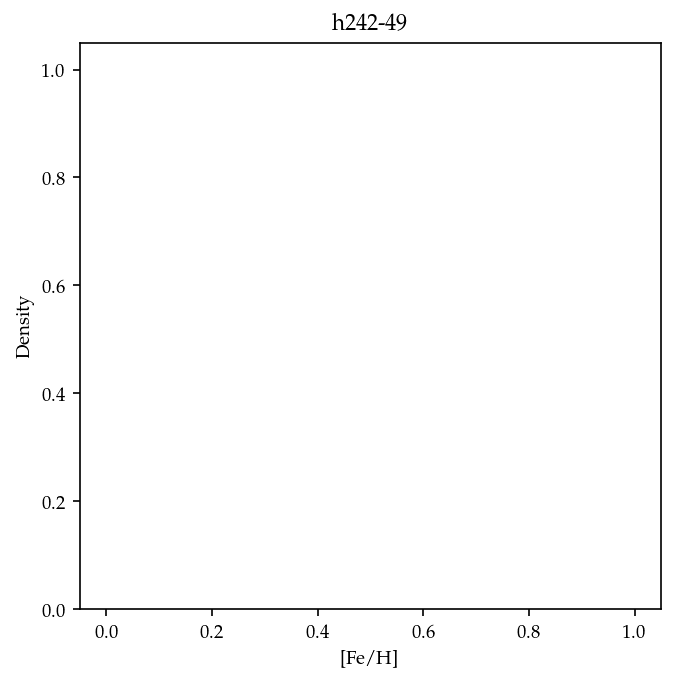

67 	 93


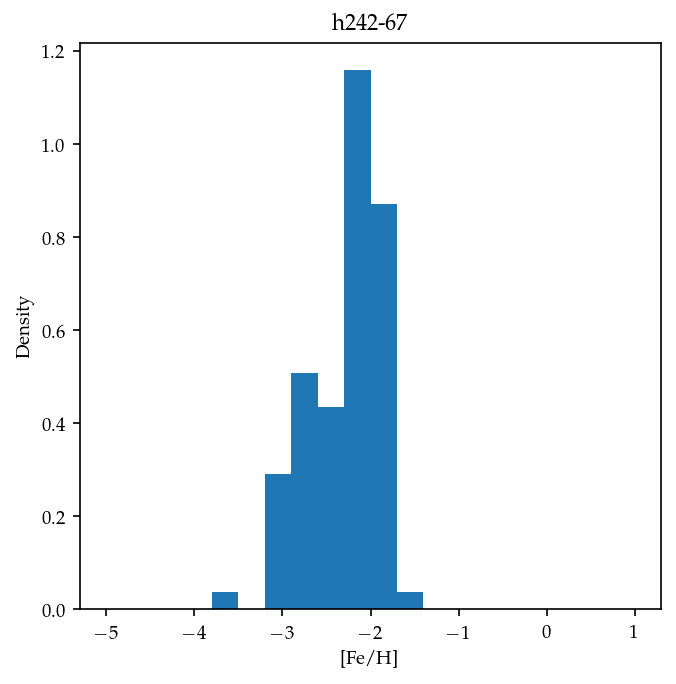

71 	 126


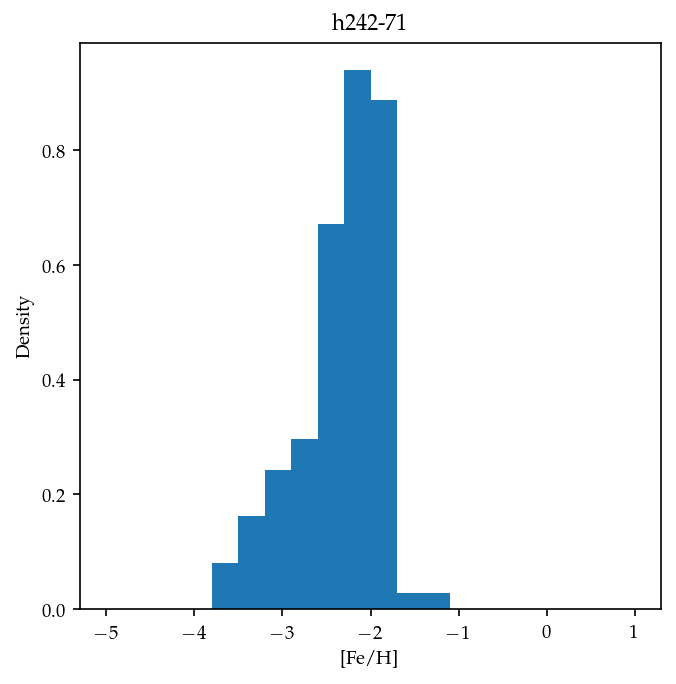

81 	 64


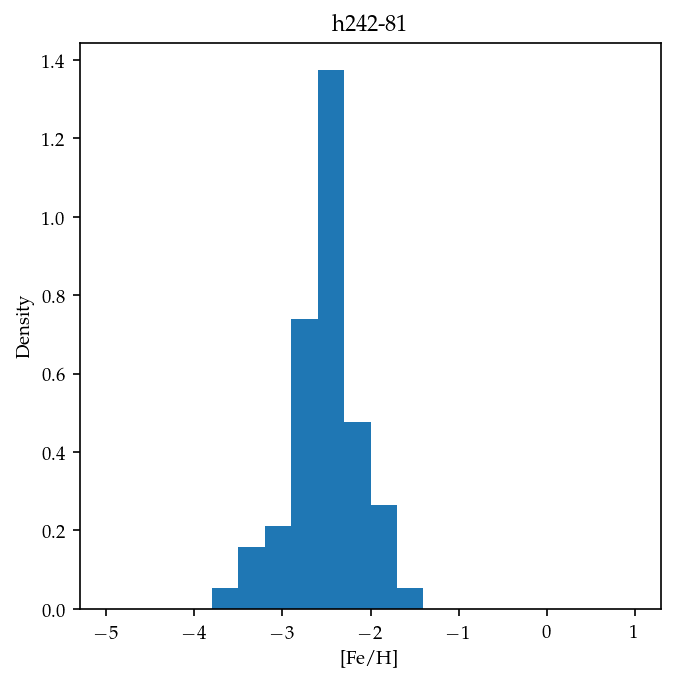

102 	 74


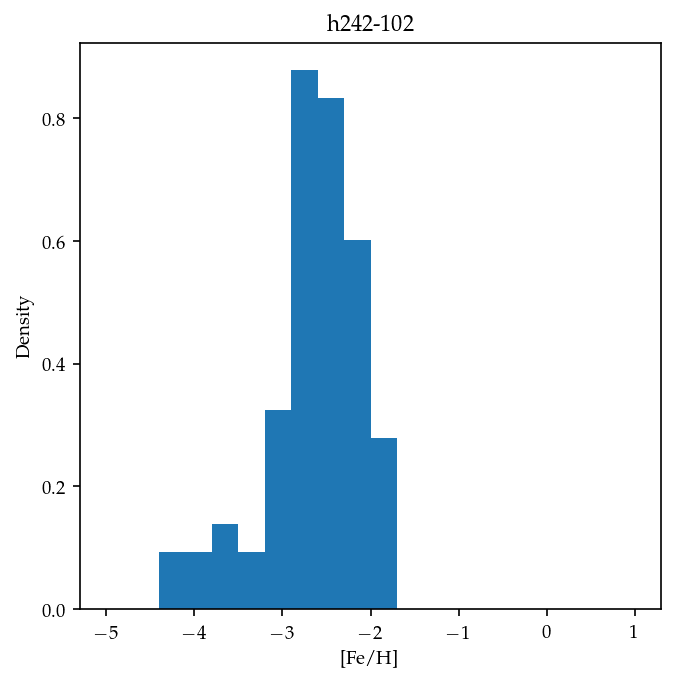

131 	 16


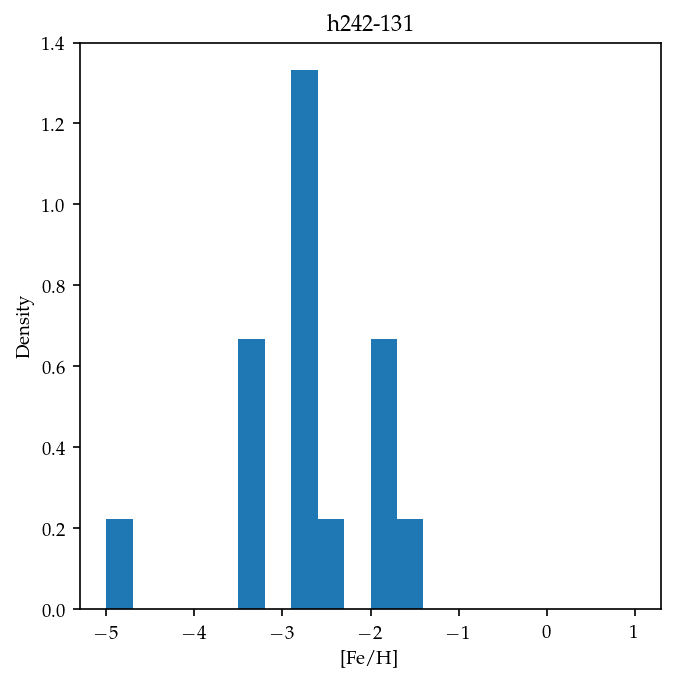

407 	 1543


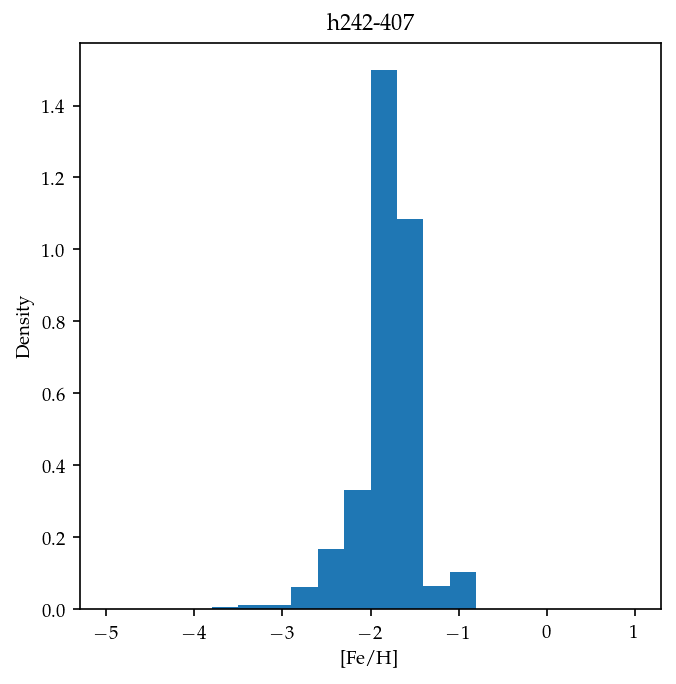

418 	 199


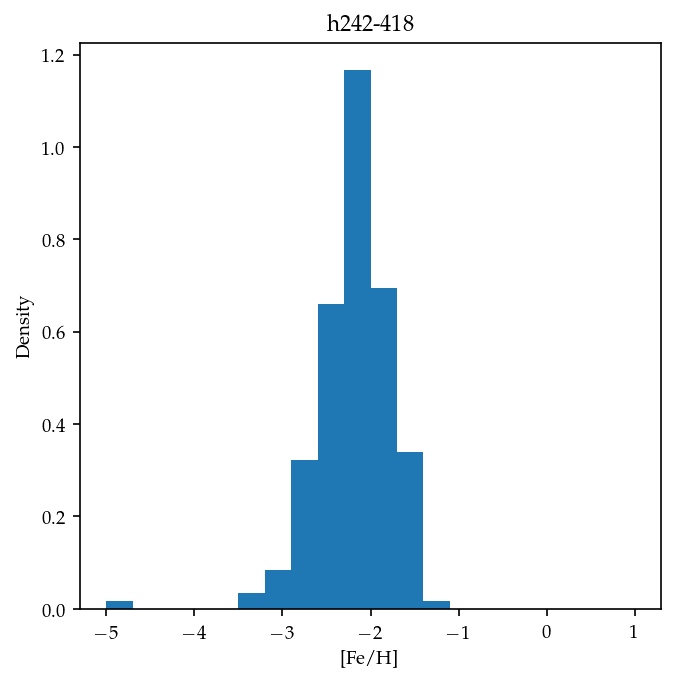

1534 	 8


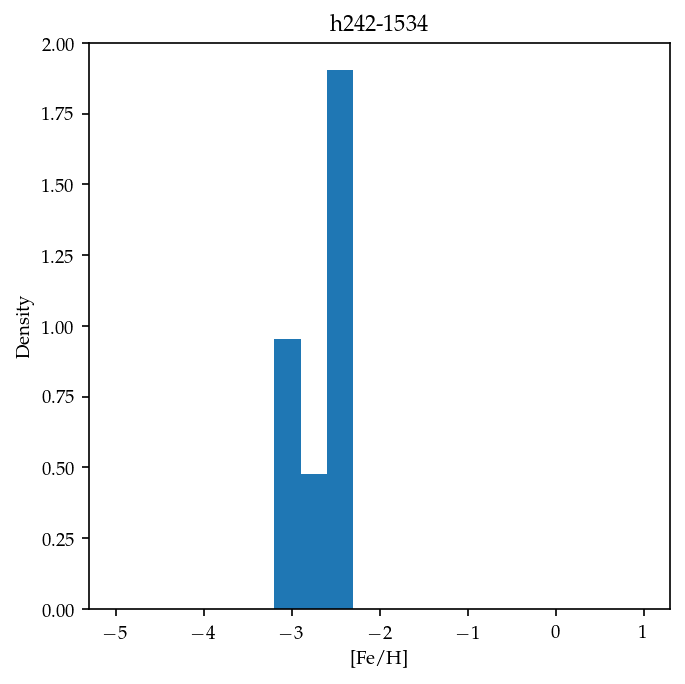

2551 	 1


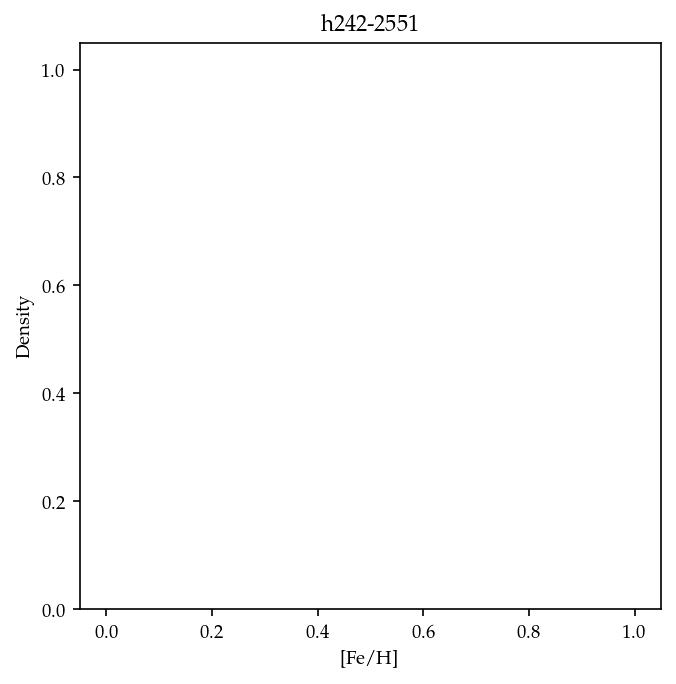

8678 	 1


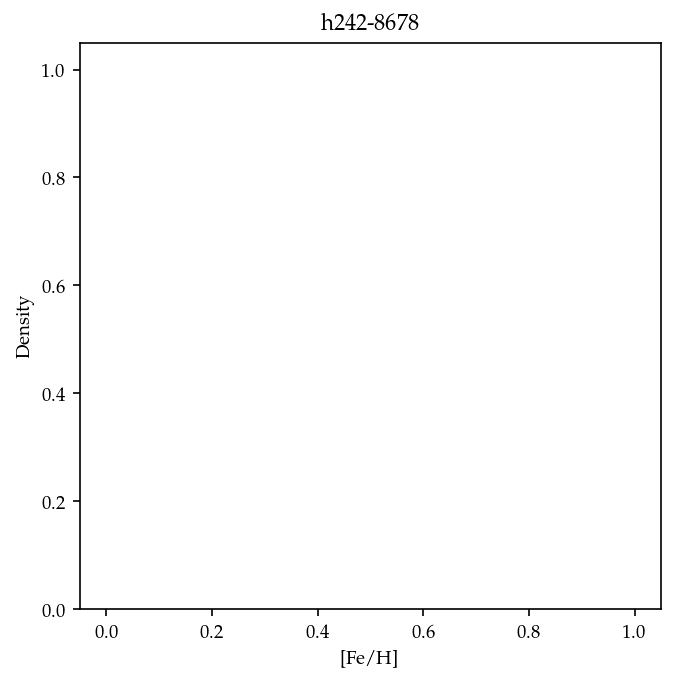

9724 	 1


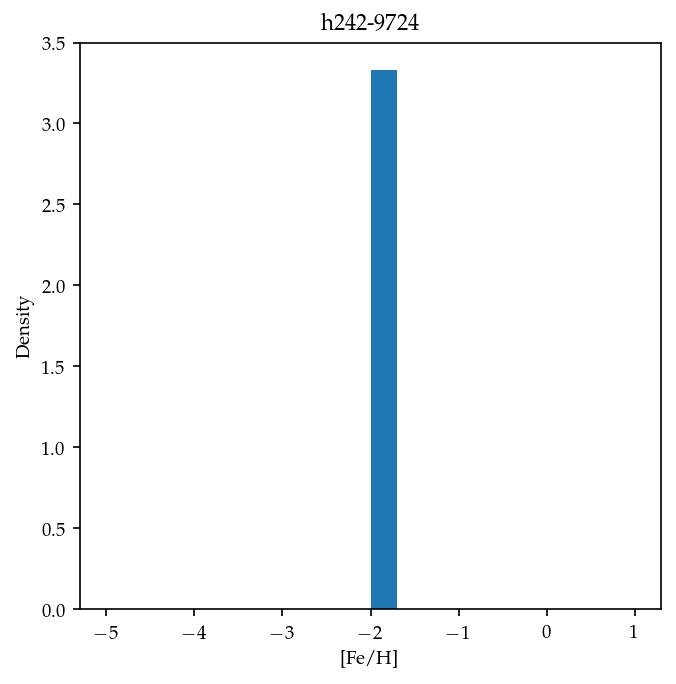

11563 	 2


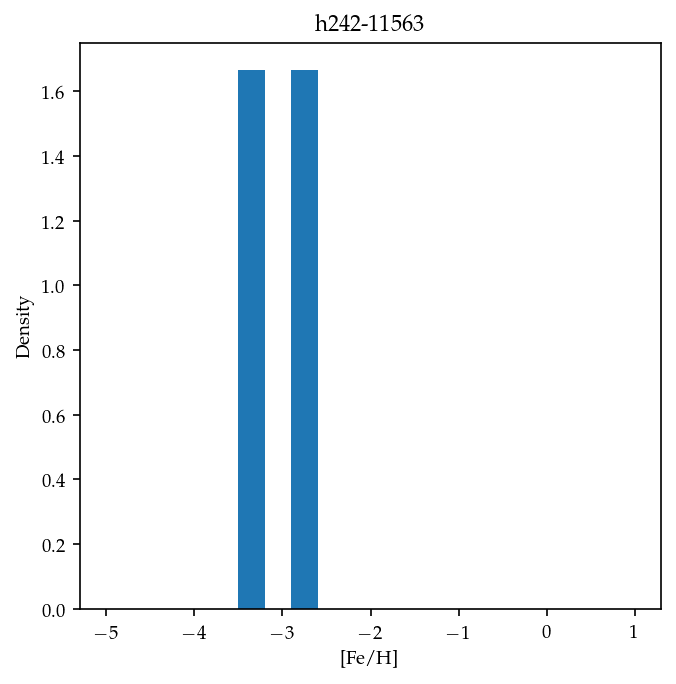

In [91]:
data = read_file('h242')

for haloid in np.unique(data.haloid):
    c_data = data[data.haloid==haloid]
    feh = c_data.feh.tolist()[0]
    mass = c_data.stars_mass.tolist()[0]
    nstar = c_data.n_star.tolist()[0]
    print(str(haloid),'\t',nstar)
    
    plt.figure(dpi=150, figsize=(5,5))
    plt.hist(feh, bins=20, density=True, weights=mass, range=(-5,1))
    plt.title('h242-'+str(haloid))
    plt.xlabel('[Fe/H]')
    plt.ylabel('Density')
    plt.show()

In [98]:
data = read_file('h242')
data = data[data.n_star > 100]
len(data)

13

In [101]:
print(data.haloid)

0       1
1       4
2      10
3      21
4      27
5      31
6      35
7      37
8      45
10     48
13     71
17    407
18    418
Name: haloid, dtype: int64


halo 1 	 17878582
halo 4 	 163865
halo 10 	 160009
halo 21 	 2467
halo 27 	 4359
halo 31 	 461
halo 35 	 369
halo 37 	 219
halo 45 	 154
halo 48 	 4951
halo 67 	 93
halo 71 	 126
halo 81 	 64
halo 102 	 74
halo 407 	 1543
halo 418 	 199


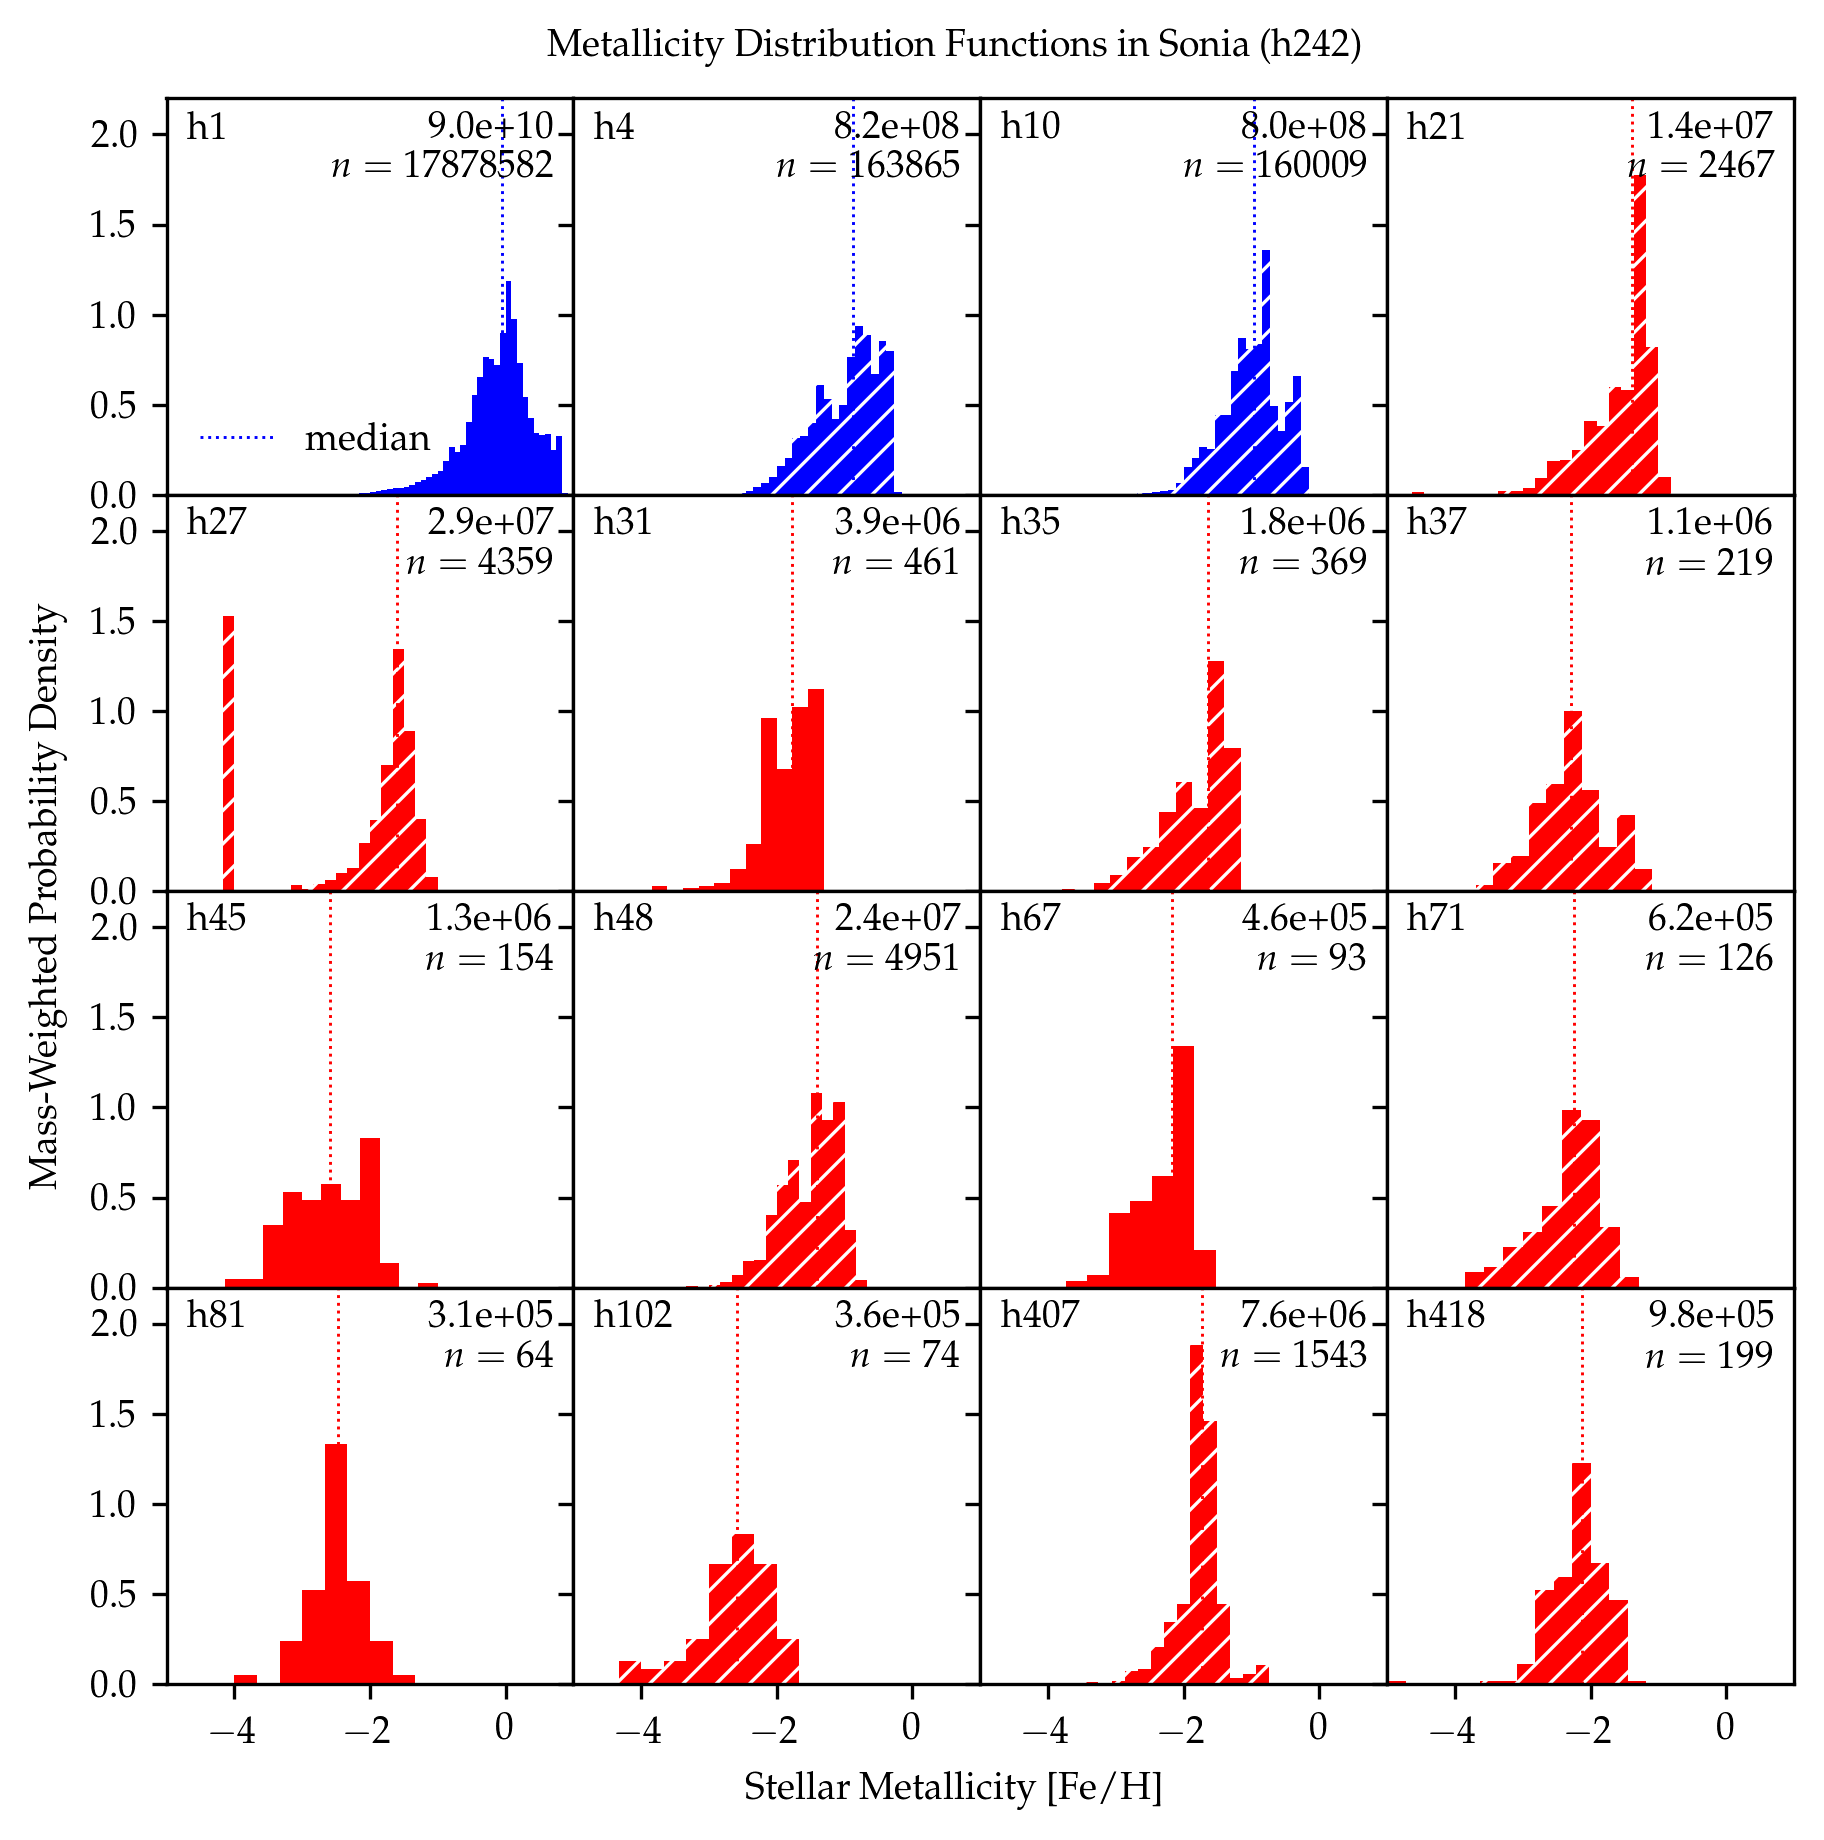

In [164]:
data = read_file('h242')
data = data[data.n_star > 50]

fig, ax = plt.subplots(4,4,dpi=300,sharex=True,sharey=True, figsize=(7,7))

def add_hist(data,haloid, x,y,ymax):
    xmin,xmax = -5,1

    c_data = data[data.haloid==haloid]
    feh = c_data.feh.tolist()[0]
    mass = c_data.stars_mass.tolist()[0]
    nstar = c_data.n_star.tolist()[0]
    
    sSFR = c_data.sSFR.tolist()[0]
    
    q = sSFR < 1e-11
    if q:
        color = 'red'
    else:
        color = 'blue'
        
    h1dist = c_data.h1dist.tolist()[0]
    s = (h1dist < 300) and (h1dist != 0)
    
    if s:
        hatch = '///'
    else:
        hatch = False
    
    nbins = int(10*np.log10(nstar))
    mstar = c_data.M_star.tolist()[0]
    
    print('halo '+str(haloid),'\t',nstar)
    ax[x,y].hist(feh, 
                 bins=nbins, 
                 density=True, 
                 weights=mass, 
                 range=(xmin,xmax), 
                 facecolor=color, 
                 histtype='step', 
                 fill=True, 
                 edgecolor='white', 
                 hatch=hatch, 
                 lw=0)
    
    ax[x,y].annotate('h'+str(haloid), xy=(0.05, 0.9), xycoords='axes fraction')
    ax[x,y].annotate(f'{mstar:.1e}', xy=(0.95,0.9),xycoords='axes fraction', ha='right')
    ax[x,y].annotate('$n =$ '+str(int(nstar)), xy=(0.95,0.8),xycoords='axes fraction', ha='right')
    
    mean = np.median(feh)
    ax[x,y].plot([mean,mean],[0,2.2],linestyle=':',color=color,linewidth=0.7,label='median')
    
    ax[x,y].set_ylim(0,ymax)
    ax[x,y].set_xlim(xmin,xmax)
    
    if x==0 and y==0:
        ax[x,y].legend(loc='lower left',frameon=False)
        
    
    
ys = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
xs = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
ids = [1, 4, 10, 21, 27, 31, 35, 37, 45, 48, 67, 71, 81, 102, 407, 418]

for x, y, i in zip(xs,ys,ids):
    add_hist(data,i,x,y,2.2)


fig.text(0.5, 0.9, 'Metallicity Distribution Functions in Sonia (h242)', ha='center')
fig.text(0.5, 0.07, 'Stellar Metallicity [Fe/H]', ha='center')
fig.text(0.06, 0.5, 'Mass-Weighted Probability Density', va='center', rotation='vertical')



plt.subplots_adjust(hspace=0., wspace=0.)
plt.show()

halo 1 	 20189200
halo 2 	 162886
halo 5 	 7068
halo 6 	 4954
halo 10 	 4642
halo 14 	 672
halo 18 	 15681
halo 21 	 175
halo 24 	 973
halo 45 	 1379
halo 46 	 127
halo 48 	 93


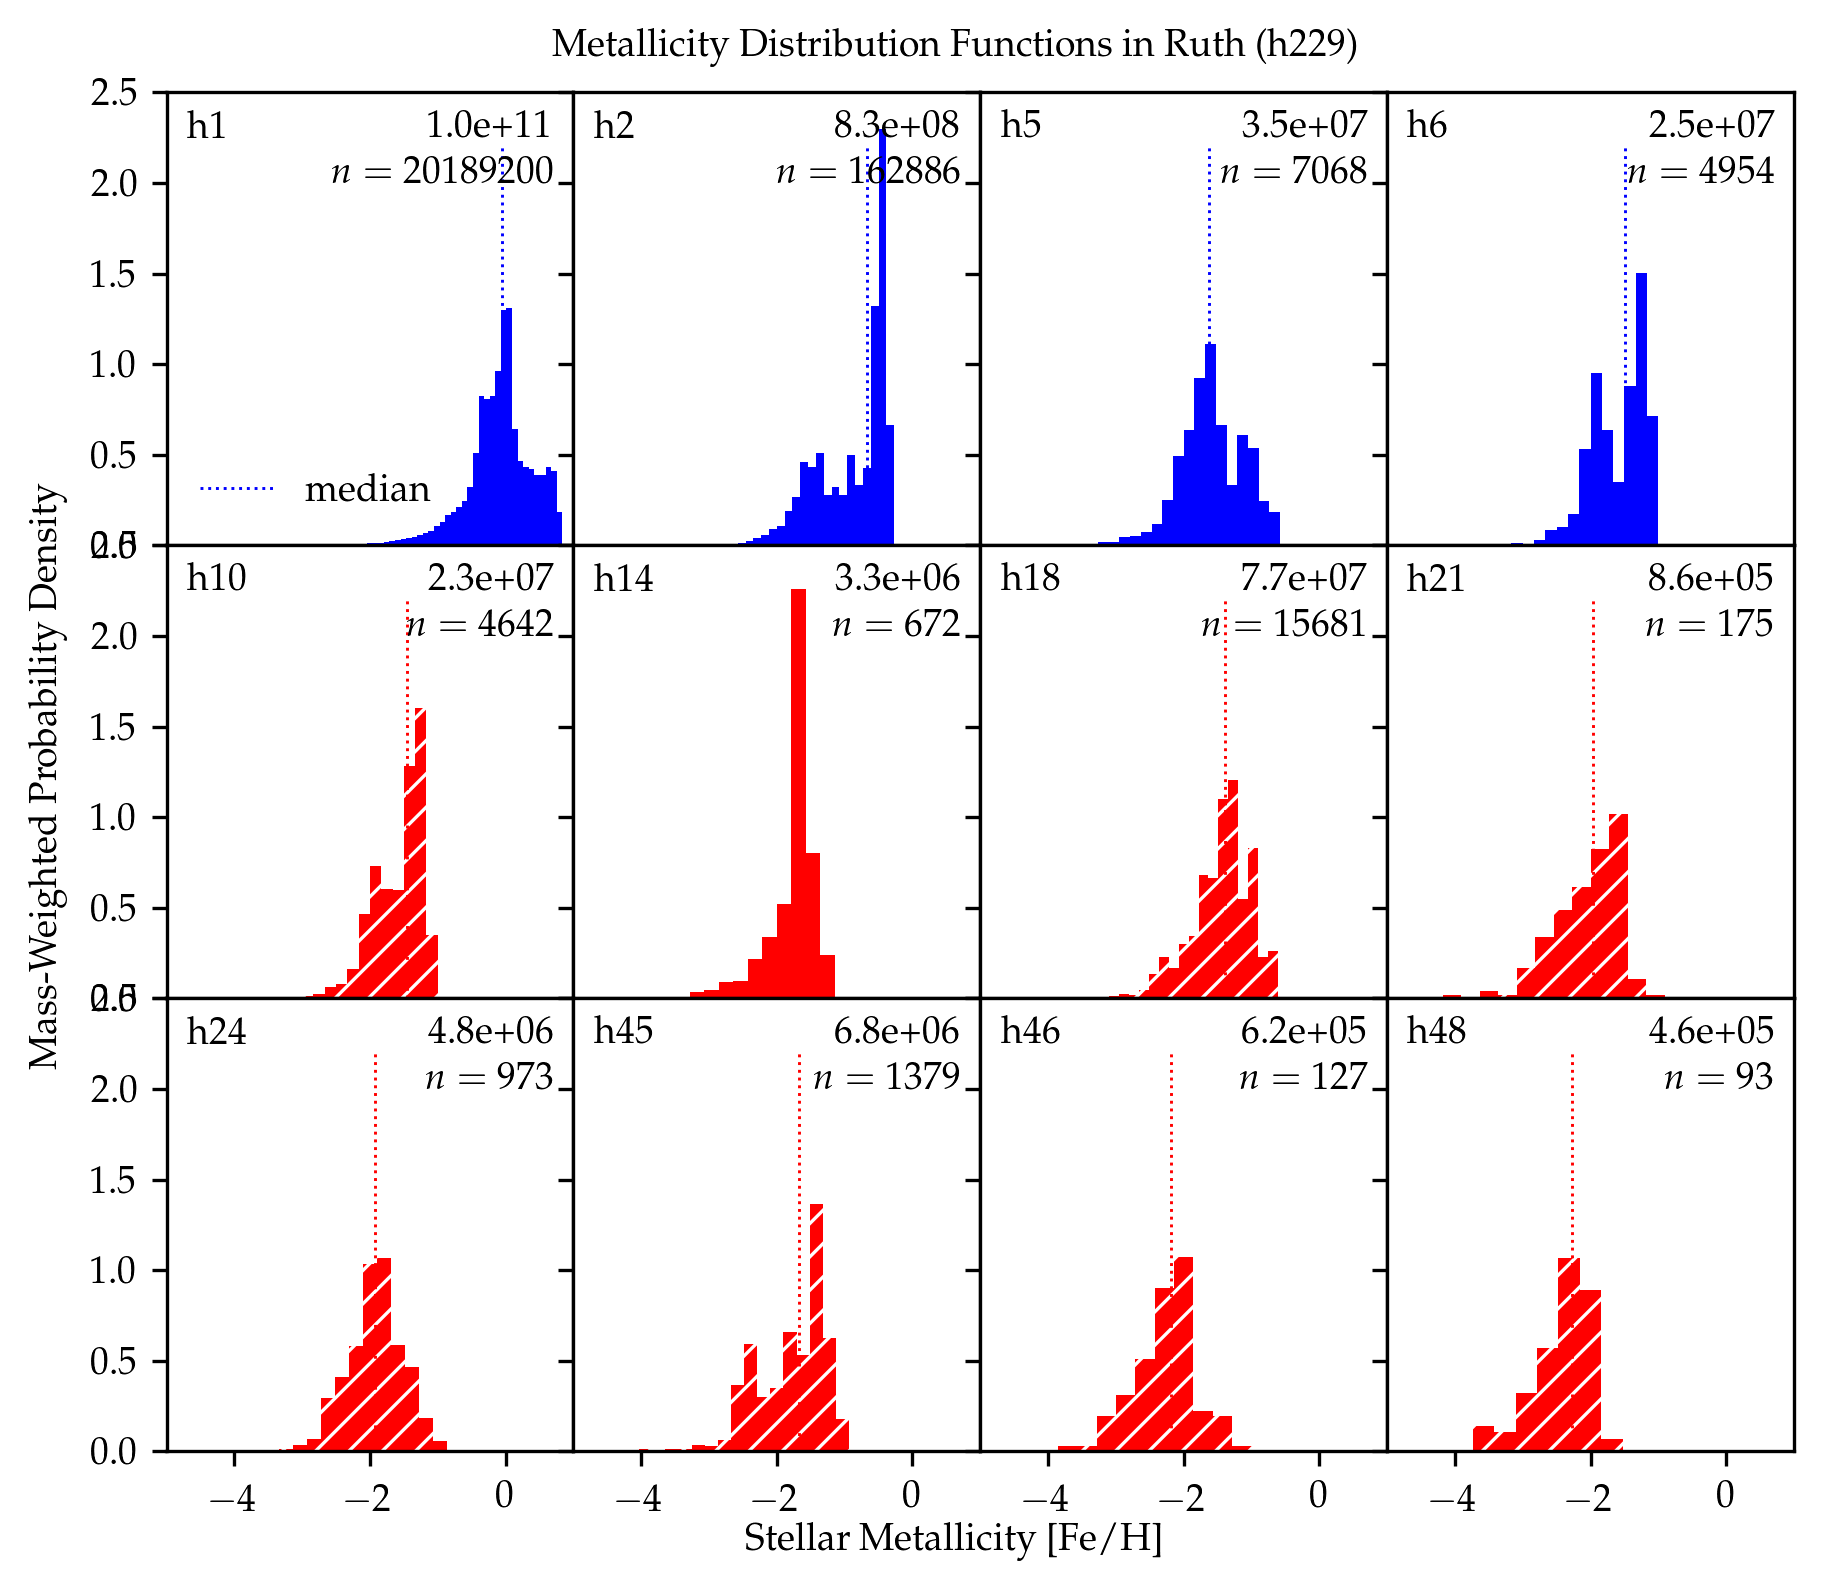

In [166]:
data = read_file('h229')
data = data[data.n_star > 50]

fig, ax = plt.subplots(3,4,dpi=300,sharex=True,sharey=True, figsize=(7,6))
    
    
ys = [0,1,2,3,0,1,2,3,0,1,2,3]
xs = [0,0,0,0,1,1,1,1,2,2,2,2]
ids = [1, 2, 5, 6, 10, 14, 18, 21, 24, 45, 46, 48] # check out what went wrong with Halo 16, 32, 52

for x, y, i in zip(xs,ys,ids):
    add_hist(data,i,x,y,2.5)


fig.text(0.5, 0.9, 'Metallicity Distribution Functions in Ruth (h229)', ha='center')
fig.text(0.5, 0.07, 'Stellar Metallicity [Fe/H]', ha='center')
fig.text(0.06, 0.5, 'Mass-Weighted Probability Density', va='center', rotation='vertical')



plt.subplots_adjust(hspace=0., wspace=0.)
plt.show()